In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [59]:
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rcParams['axes.linewidth'] = 1.0


font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 13}

plt.rc('font', **font)

In [60]:
parametros = pd.read_csv('parametros_finais.csv', comment = '#')
aglomerado = pd.read_csv('final_semradec.csv')

In [61]:
chi = parametros[parametros.Metodo == 'Chi']
beau = parametros[parametros.Metodo == 'Beauchamp']
dias = parametros[parametros.Metodo == 'DIAS2022']

In [62]:
dias

,Metodo,Age,ModDist
0,DIAS2022,9.2,13.67


In [63]:
dias.ModDist.item() - beau.ModDist.item()

0.8454654046607502

In [64]:
dias.ModDist.item() - chi.ModDist.item()

0.2954654046607512

In [65]:
cor, mag = aglomerado.bp_rp, aglomerado.phot_g_mean_mag

In [66]:
Av = 0.01 ##cantat
Av = 0.862
#Av = 0.183 ##dias
Ag = 0.83627*Av
E = (1.08337 - 0.63439)*Av

In [67]:
isocronas = pd.read_csv('../iso_gaia_clipped.csv')
isocronas = isocronas[isocronas.label<4]
isocrona_chi = isocronas[isocronas['logAge']==chi.Age.item()]
isocrona_beau = isocronas[isocronas['logAge']==beau.Age.item()]
isocrona_dias = isocronas[isocronas['logAge']==dias.Age.item()]

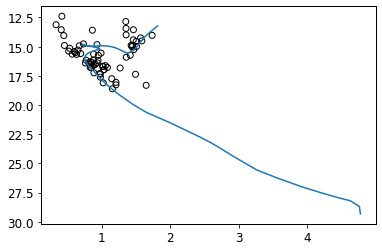

In [68]:
fig, ax = plt.subplots()
ax.scatter(cor,mag, color = 'None', edgecolor = 'black')
ax.plot(isocrona_chi['BP-RP'] + E, isocrona_chi['Gmag'] + Ag + chi.ModDist.item())
ax.invert_yaxis()

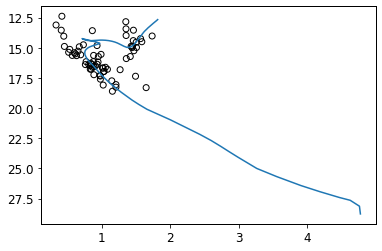

In [69]:
fig, ax = plt.subplots()
ax.scatter(cor,mag, color = 'None', edgecolor = 'black')
ax.plot(isocrona_beau['BP-RP'] + E, isocrona_beau['Gmag'] + Ag + beau.ModDist.item())
ax.invert_yaxis()

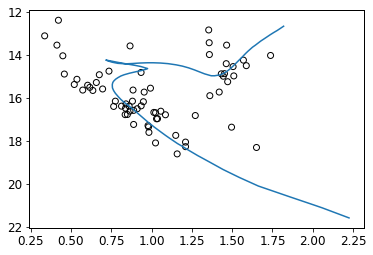

In [70]:
beau_clip = isocrona_beau.loc[isocrona_beau['BP-RP'] < max(cor) + 0.1]
fig, ax = plt.subplots()
ax.scatter(cor,mag, color = 'None', edgecolor = 'black')
ax.plot(beau_clip['BP-RP'] + E, beau_clip['Gmag'] + Ag + beau.ModDist.item())
ax.invert_yaxis()

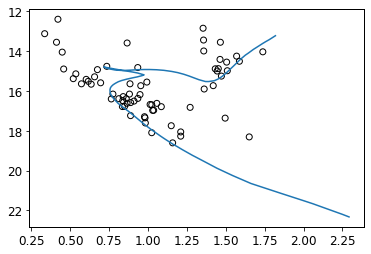

In [71]:
chi_clip = isocrona_chi.loc[isocrona_chi['BP-RP'] < max(cor) + 0.2]
fig, ax = plt.subplots()
ax.scatter(cor,mag, color = 'None', edgecolor = 'black')
ax.plot(chi_clip['BP-RP'] + E, chi_clip['Gmag'] + Ag + chi.ModDist.item())
ax.invert_yaxis()

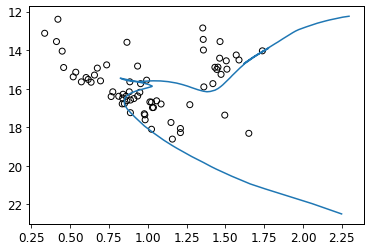

In [72]:
dias_clip = isocrona_dias.loc[isocrona_dias['BP-RP'] < max(cor) + 0.2]
fig, ax = plt.subplots()

ax.scatter(cor,mag, color = 'None', edgecolor = 'black')
ax.plot(dias_clip['BP-RP'] + E, dias_clip['Gmag'] + Ag + dias.ModDist.item())
ax.invert_yaxis()

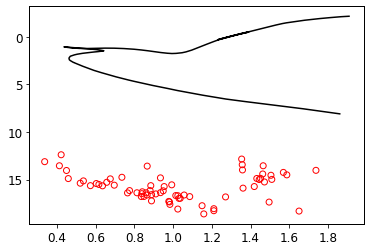

In [73]:
fig, ax = plt.subplots()

ax.scatter(cor,mag, color = 'None', edgecolor = 'red')
ax.plot(dias_clip['BP-RP'], dias_clip['Gmag'], color = 'k')
ax.invert_yaxis()

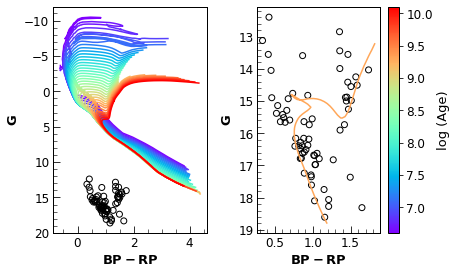

In [74]:
from matplotlib.ticker import AutoMinorLocator
import matplotlib as mpl

fig = plt.figure()
ax1 = fig.add_subplot(2,2,(1,3))
ax2 = fig.add_subplot(2,2,(2,4))






age = [6.6 ,6.8, 7.2, 7.6, 8.0, 8.4, 8.6, 9.2, 9.6, 9.9]

idades = np.unique(isocronas['logAge'])

df = isocronas[isocronas.label < 4]

i = -1
j = 4


n = len(idades)
#colors = plt.cm.gist_ncar(np.linspace(0,1,n))
colors = plt.cm.rainbow(np.linspace(0,1,n))



for k in range(len(idades)):
    data = df[df['logAge'] == idades[k] ]
    ax1.plot(data['G_BPmag'][j:i]-data['G_RPmag'][j:i],data['Gmag'][j:i], linewidth = 1.5, color = colors[k])
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax1.tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax1.tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax1.tick_params(which = 'minor', axis = 'x', direction='in', length = 4)
ax1.invert_yaxis()
ax1.set_ylabel(r'$\mathbf{G}$')
ax1.set_xlabel(r'$\mathbf{BP - RP}$')


i = 13
ax1.scatter(cor,mag, color = 'None', edgecolor = 'k')
#ax1.plot(dias_clip['BP-RP'][i:], dias_clip['Gmag'][i:], color = 'k')
ax1.set_ylabel(r'$\mathbf{G}$')
ax1.set_xlabel(r'$\mathbf{BP - RP}$')


ax2.scatter(cor,mag, color = 'None', edgecolor = 'k')
ax2.plot(chi_clip['BP-RP'][i:] + E, chi_clip['Gmag'][i:] + Ag+ chi.ModDist.item(), color  = colors[27])
ax2.invert_yaxis()
ax2.set_ylabel(r'$\mathbf{G}$')
ax2.set_xlabel(r'$\mathbf{BP - RP}$')


ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax2.tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax2.tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax2.tick_params(which = 'minor', axis = 'x', direction='in', length = 4)

plt.tight_layout()

norm = mpl.colors.Normalize(vmin=6.6, vmax=10.1)
cb1 = plt.cm.ScalarMappable(norm = norm, cmap='rainbow')

fig.colorbar(cb1, label = 'log (Age)')

#plt.savefig('fit_isochrone.jpg', format = 'jpg', dpi = 300)
#plt.savefig('algorithm_idea.jpg', format = 'jpg', dpi = 300)

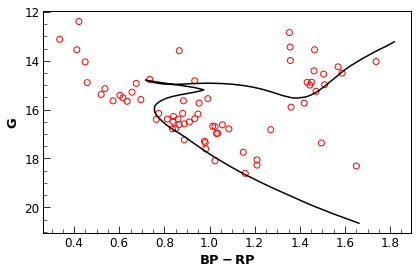

In [85]:
from matplotlib.ticker import AutoMinorLocator

fig, ax2 = plt.subplots()

i = 6

Av = 0.01 ##cantat
Av = 0.862 #0.862
#Av = 0.183 ##dias
Ag = 0.83627*Av
E = (1.08337 - 0.63439)*Av

iso93 = isocronas[isocronas['logAge']==9.3]
iso90 = isocronas[isocronas['logAge']==9.0]
iso92 = isocronas[isocronas['logAge']==9.2]
iso93 = iso93.loc[iso93['BP-RP'] < max(cor) + 0.1]
iso90 = iso90.loc[iso90['BP-RP'] < max(cor) + 0.1]
iso92 = iso92.loc[iso92['BP-RP'] < max(cor) + 0.1]

ax2.scatter(cor,mag, color = 'None', edgecolor = 'red')
ax2.plot(chi_clip['BP-RP'][i:] + E, chi_clip['Gmag'][i:] + Ag + chi.ModDist.item(), color  = 'k')
#ax2.plot(iso92['BP-RP'][i:] + E, iso92['Gmag'][i:]  + Ag + chi.ModDist.item(), color  = 'k')
#ax2.plot(iso93['BP-RP'][i:] + E, iso93['Gmag'][i:]  + Ag + chi.ModDist.item(), '--', color  = 'k')
ax2.invert_yaxis()
ax2.set_ylabel(r'$\mathbf{G}$')
ax2.set_xlabel(r'$\mathbf{BP - RP}$')


ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax2.tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax2.tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax2.tick_params(which = 'minor', axis = 'x', direction='in', length = 4)

plt.tight_layout()
plt.savefig('be23-final.jpg', format = 'jpg', dpi = 300)

In [86]:
can = pd.read_csv('table-cantat.csv')

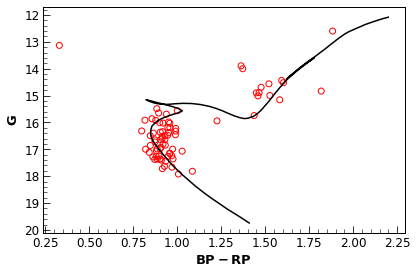

In [96]:
from matplotlib.ticker import AutoMinorLocator

fig, ax2 = plt.subplots()

i = 6

Av = 0.01 ##cantat
Av = 0.862 #0.862
#Av = 0.183 ##dias
Ag = 0.83627*Av
E = (1.08337 - 0.63439)*Av

iso93 = isocronas[isocronas['logAge']==9.3]
iso90 = isocronas[isocronas['logAge']==9.0]
iso92 = isocronas[isocronas['logAge']==9.2]

diasiso = isocronas[isocronas['logAge']==dias.Age.item()]
diasiso= diasiso.loc[diasiso['BP-RP'] < max(cor) + 0.1]

iso93 = iso93.loc[iso93['BP-RP'] < max(cor) + 0.1]
iso90 = iso90.loc[iso90['BP-RP'] < max(cor) + 0.1]
iso92 = iso92.loc[iso92['BP-RP'] < max(cor) + 0.1]

ax2.scatter(can['BP-RP'],can['Gmag'], color = 'None', edgecolor = 'red')
#ax2.plot(diasiso['BP-RP'][i:] + E, diasiso['Gmag'][i:] + Ag + chi.ModDist.item(), color  = 'k')
#ax2.plot(chi_clip['BP-RP'][i:] + E, chi_clip['Gmag'][i:]  + Ag + chi.ModDist.item(), color  = 'k')
ax2.plot(iso92['BP-RP'][i:] + E, iso92['Gmag'][i:]  + Ag + chi.ModDist.item(), color  = 'k')
ax2.invert_yaxis()
ax2.set_ylabel(r'$\mathbf{G}$')
ax2.set_xlabel(r'$\mathbf{BP - RP}$')


ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax2.tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax2.tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax2.tick_params(which = 'minor', axis = 'x', direction='in', length = 4)

plt.tight_layout()
plt.savefig('be23-final.jpg', format = 'jpg', dpi = 300)

In [97]:
10**((-Ag + chi.ModDist.item())/5 + 1)

3394.1729738964586